In [1]:
#import os
#import cv2
#import numpy as np
#import pandas as pd
#import math
#
## --- Configuración base ---
#ruta_base = "E:/Users/Documents/Trabajo/Cedulas/imagenes_cedula_peq"
#archivo_guardado = "progreso_orientacion.csv"
#
## --- Cargar progreso si existe ---
#if os.path.exists(archivo_guardado):
#    df_existente = pd.read_csv(archivo_guardado)
#    archivos_procesados = set(df_existente["File"].tolist())
#    data = df_existente.to_dict("records")
#    print(f"🟡 Cargando progreso anterior: {len(data)} imágenes ya procesadas.")
#else:
#    archivos_procesados = set()
#    data = []
#    print("🔵 Comenzando desde cero.")
#
#
## --- Obtener ángulo entre dos puntos ---
#def obtener_angulo_desde_imagen(ruta_imagen):
#    puntos = []
#    cancelado = False
#
#    def click_event(event, x, y, flags, param):
#        if event == cv2.EVENT_LBUTTONDOWN and len(puntos) < 2:
#            puntos.append((x, y))
#            cv2.circle(img, (x, y), 5, (0, 255, 0), -1)
#            cv2.imshow("Selecciona 2 puntos", img)
#
#    img = cv2.imread(ruta_imagen)
#    if img is None:
#        print(f"No se pudo cargar la imagen: {ruta_imagen}")
#        return None
#
#    cv2.imshow("Selecciona 2 puntos", img)
#    cv2.setMouseCallback("Selecciona 2 puntos", click_event)
#
#    while len(puntos) < 2:
#        key = cv2.waitKey(1) & 0xFF
#        if key == 27:  # ESC
#            cancelado = True
#            break
#
#    cv2.destroyAllWindows()
#
#    if cancelado:
#        return 0.0  # Usuario canceló → ángulo = 0
#    elif len(puntos) == 2:
#        dx = puntos[1][0] - puntos[0][0]
#        dy = puntos[1][1] - puntos[0][1]
#        angulo_rad = math.atan2(dy, dx)
#        angulo_deg = math.degrees(angulo_rad)
#        return angulo_deg
#    return None
#
#
## --- Ajustar ángulo manualmente ---
#def ajustar_angulo(angulo_original, ajuste=0.0):
#    angulo_ajustado = angulo_original + ajuste
#    while angulo_ajustado > 180:
#        angulo_ajustado -= 360
#    while angulo_ajustado < -180:
#        angulo_ajustado += 360
#    return -angulo_ajustado
#
#
## --- Procesar imágenes ---
#for carpeta_actual, subcarpetas, archivos in os.walk(ruta_base):
#    for archivo in archivos:
#        if not archivo.lower().endswith((".jpg", ".png")):
#            continue
#
#        if archivo in archivos_procesados:
#            continue  # Ya procesado
#
#        ruta_completa = os.path.join(carpeta_actual, archivo)
#        etiqueta = os.path.basename(carpeta_actual)
#        print(f"/n🖼 Procesando imagen: {archivo}")
#
#        angulo = obtener_angulo_desde_imagen(ruta_completa)
#        if angulo is None:
#            print("⚠️ Imagen omitida.")
#            continue
#
#        usar_ajuste = (
#            input("¿Deseas ajustar manualmente el ángulo? (s/n): ").strip().lower()
#        )
#        if usar_ajuste == "s":
#            try:
#                ajuste = float(
#                    input("Introduce el ángulo a sumar/restar (en grados): ")
#                )
#                angulo = ajustar_angulo(angulo, ajuste)
#            except ValueError:
#                print("⚠️ Valor inválido. Se mantiene el ángulo original.")
#
#        entrada = {
#            "Path": ruta_completa,
#            "File": archivo,
#            "Label": etiqueta,
#            "Angle": angulo,
#        }
#        data.append(entrada)
#
#        # Guardar después de cada imagen
#        df_temp = pd.DataFrame(data)
#        df_temp.to_csv(archivo_guardado, index=False)
#        print("✅ Progreso guardado.")
#
## --- Crear DataFrame final con columnas extra ---
#df_final = pd.DataFrame(data)
#df_final["Label_decode"], uniques = pd.factorize(df_final["Label"])
#df_final["Angle_rad"] = np.deg2rad(df_final["Angle"])
#
## --- Exportar (opcional) ---
## df_final.to_excel("df_orientacion_final.xlsx", index=False)
#
#print("/n✅ Proceso completado. Total imágenes procesadas:", len(df_final))
#print(df_final.head())

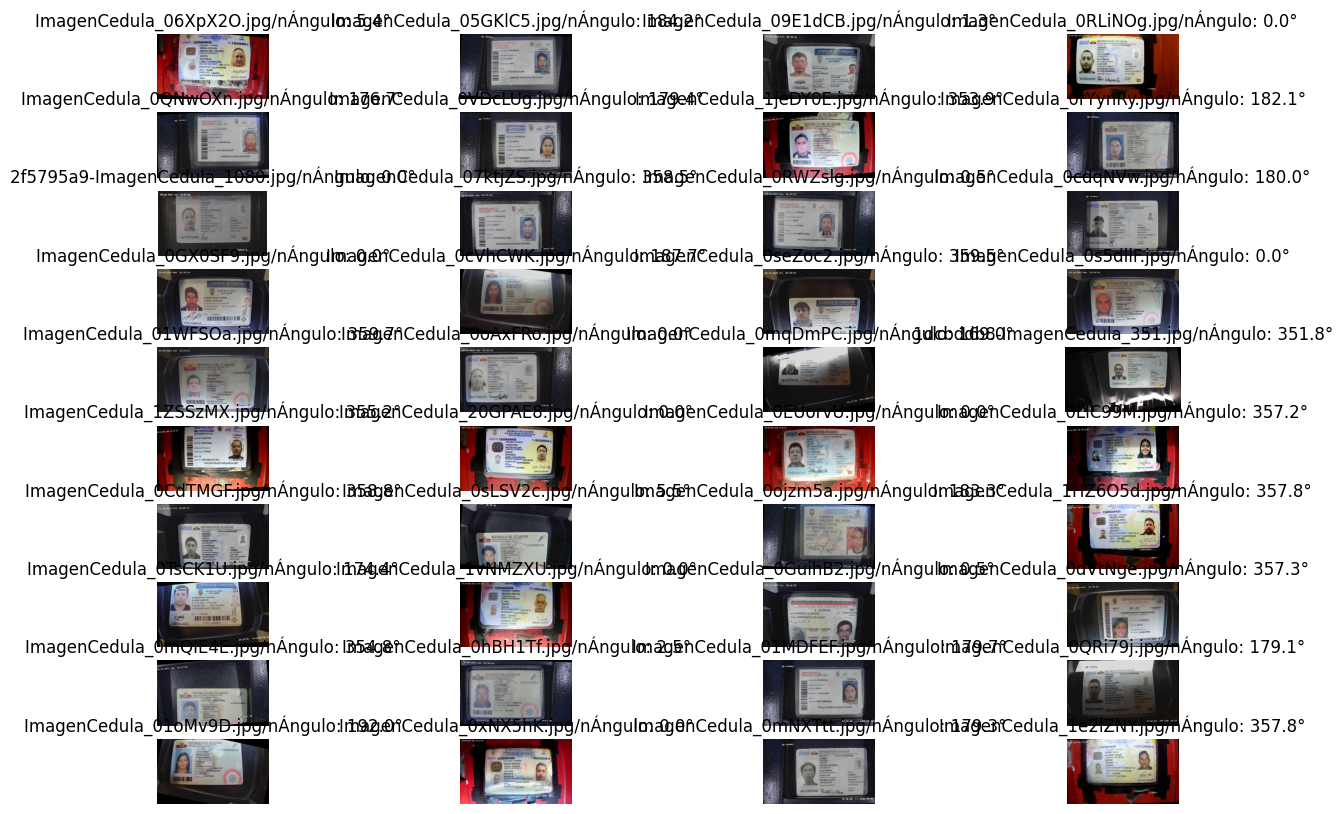

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# --- Configuración ---
csv_path = "progreso_orientacion.csv"
root_dir = "imagenes_cedula_peq"  # Cambia esta ruta

# --- Cargar CSV ---
df = pd.read_csv(csv_path)

# --- Parámetros de visualización ---
imagenes_por_fila = 4
num_imagenes = 40
df_subset = df.sample(n=min(num_imagenes, len(df)))

# --- Función para encontrar una imagen por nombre ---
def buscar_imagen_por_nombre(nombre_archivo, carpeta_raiz):
    for carpeta_actual, _, archivos in os.walk(carpeta_raiz):
        if nombre_archivo in archivos:
            return os.path.join(carpeta_actual, nombre_archivo)
    return None  # No encontrada

# --- Plot ---
fig, axs = plt.subplots(
    nrows=(num_imagenes + imagenes_por_fila - 1) // imagenes_por_fila,
    ncols=imagenes_por_fila,
    figsize=(15, 10)
)
axs = axs.flatten()

for i, (idx, row) in enumerate(df_subset.iterrows()):
    try:
        nombre = row["File"]
        angle = row["Angle"]
        path_completo = buscar_imagen_por_nombre(nombre, root_dir)

        if path_completo is None:
            raise FileNotFoundError(f"No se encontró: {nombre}")

        img = Image.open(path_completo).convert("RGB")
        img_rotated = img.rotate(-angle)

        axs[i].imshow(img_rotated)
        axs[i].set_title(f'{nombre}/nÁngulo: {angle:.1f}°')
        axs[i].axis("off")

    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error:/n{e}", ha="center", va="center")
        axs[i].axis("off")

# Ocultar subplots vacíos
for j in range(i + 1, len(axs)):
    axs[j].axis("off")





In [3]:
import os
from PIL import Image
df_angle = pd.read_csv("progreso_orientacion.csv")
ruta_base = root_dir
archivos_procesados = set(df_angle["File"].tolist())

# Asegura que la columna 'Matrix' exista
df_angle["Matrix"] = None

for carpeta_actual, subcarpetas, archivos in os.walk(ruta_base):
    for archivo in archivos:
        if archivo.lower().endswith((".jpg", ".png")):
            if archivo in archivos_procesados:
                ruta_img = os.path.join(carpeta_actual, archivo)
                try:
                    img = Image.open(ruta_img).convert("RGB")
                    # Buscar el índice correspondiente
                    idx = df_angle[df_angle["File"] == archivo].index
                    if not idx.empty:
                        df_angle.at[idx[0], "Matrix"] = img
                except Exception as e:
                    print(f"Error al procesar {archivo}: {e}")

print(df_angle)
#for l in df_angle["Matrix"]:
#    print(l)

                          File            Label       Angle  \
0     ImagenCedula_00Reebs.jpg  Cedula_Amarilla  181.997880   
1     ImagenCedula_00UTrgn.jpg  Cedula_Amarilla   10.124672   
2     ImagenCedula_00vfXn4.jpg  Cedula_Amarilla  180.000000   
3     ImagenCedula_01eGLQS.jpg  Cedula_Amarilla    0.000000   
4     ImagenCedula_01Fx1jU.jpg  Cedula_Amarilla  174.588131   
...                        ...              ...         ...   
1147  ImagenCedula_1TiF7e8.jpg         Papeleta    0.000000   
1148  ImagenCedula_1ZSSzMX.jpg         Papeleta  355.192046   
1149  ImagenCedula_22etYeM.jpg         Papeleta  357.225723   
1150  ImagenCedula_2EuBvAF.jpg         Papeleta  357.709390   
1151  ImagenCedula_2Ftu6AJ.jpg         Papeleta    0.000000   

                                                 Matrix  
0     <PIL.Image.Image image mode=RGB size=480x280 a...  
1     <PIL.Image.Image image mode=RGB size=480x280 a...  
2     <PIL.Image.Image image mode=RGB size=480x280 a...  
3     <PIL.

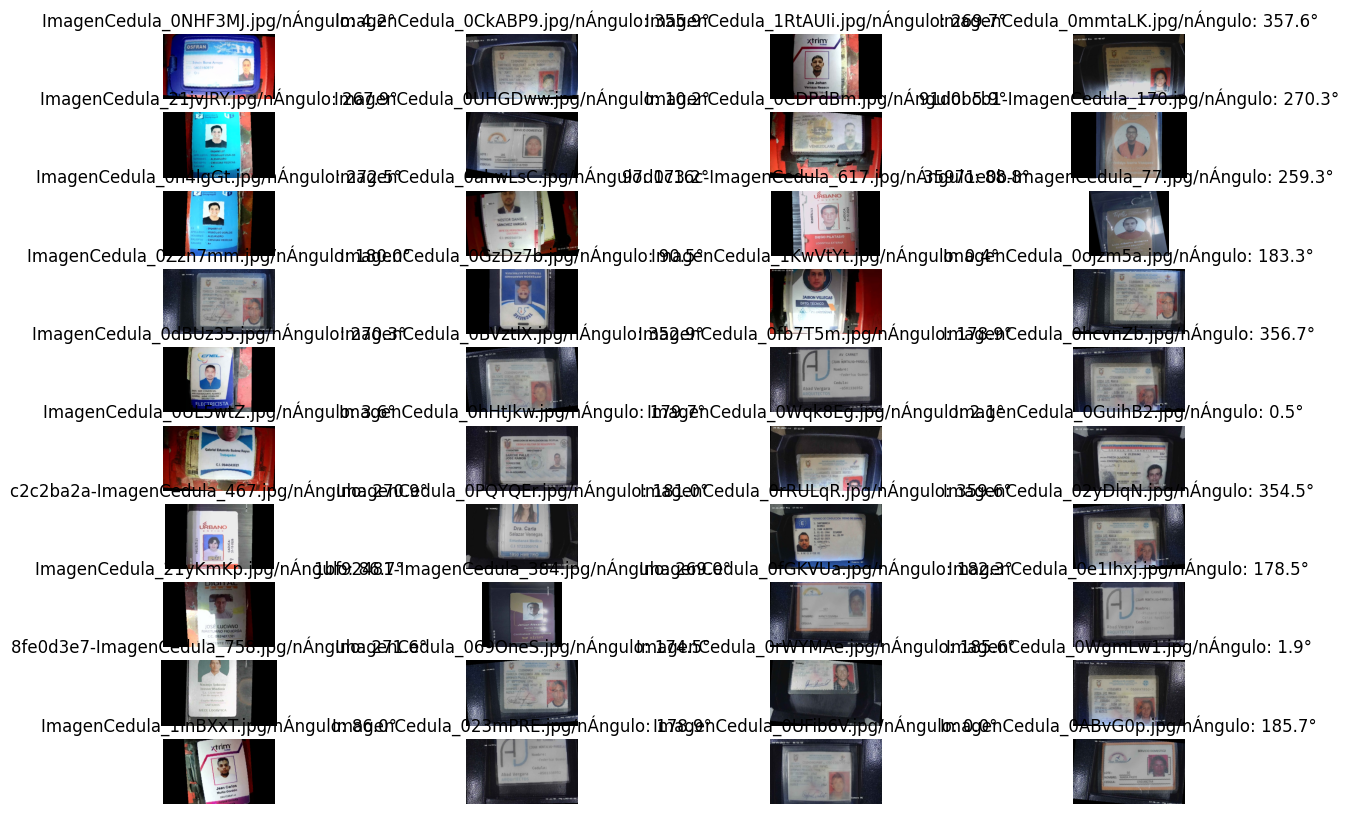

In [4]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

df_subset = df_angle[df_angle["Label"]=="Otros"].sample(n=min(num_imagenes, len(df)))

# --- Plot ---
fig, axs = plt.subplots(
    nrows=(num_imagenes + imagenes_por_fila - 1) // imagenes_por_fila,
    ncols=imagenes_por_fila,
    figsize=(15, 10)
)
axs = axs.flatten()

for i, (idx, row) in enumerate(df_subset.iterrows()):
    try:
        nombre = row["File"]
        angle = row["Angle"]

        img = row["Matrix"]
        img_rotated = img.rotate(-angle)

        axs[i].imshow(img_rotated)
        axs[i].set_title(f'{nombre}/nÁngulo: {angle:.1f}°')
        axs[i].axis("off")

    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error:/n{e}", ha="center", va="center")
        axs[i].axis("off")

# Ocultar subplots vacíos
for j in range(i + 1, len(axs)):
    axs[j].axis("off")





In [5]:
import random
from collections import defaultdict

rotation_counts = defaultdict(int)  # Guarda cuántas veces se ha rotado cada archivo

def aplicar_aumento(row):
    ran = random.uniform(1, 359)
    row["Angle"] += ran
    row["Matrix"] = row["Matrix"].rotate(ran)
    row["File"] = row["File"].replace(".jpg", f"_aumentado_{ran:.1f}.jpg")
    return row

def aumentar_df(df_base, frac, repeticiones, etiquetas):
    global df_angle
   
    for i in range(repeticiones):
        # Elegir un intervalo aleatoriamente
        df_aument = df_base[df_base["Label"].isin(etiquetas)].sample(frac=frac, random_state=i).copy()
        
        # Filtra imágenes que aún no han sido rotadas más de 2 veces
        df_aument = df_aument[df_aument["File"].apply(lambda f: rotation_counts[f] < 2)]

        if df_aument.empty:
            continue  # Saltar si no hay nada para aumentar
        
        # Rotación y actualización
        df_aument = df_aument.apply(aplicar_aumento, axis=1)

        # Actualizar contador
        for f in df_aument["File"]:
            rotation_counts[f] += 1

        # Concatenar
        df_angle = pd.concat([df_angle, df_aument], ignore_index=True)

# Aplicar a diferentes clases
aumentar_df(df_angle, frac=0.5, repeticiones=5*12,  etiquetas=["Cedula_Amarilla"])
aumentar_df(df_angle, frac=0.7, repeticiones=5*12,  etiquetas=["Cedula_Celeste"])
aumentar_df(df_angle, frac=0.8, repeticiones=7*12,  etiquetas=["Cedula_Guayaquil"])
aumentar_df(df_angle, frac=1.0, repeticiones=9*12,  etiquetas=["Licencias"])
aumentar_df(df_angle, frac=1.0, repeticiones=8*12,  etiquetas=["Papeleta"])
aumentar_df(df_angle, frac=1.0, repeticiones=11*12,  etiquetas=["Otros"])


KeyboardInterrupt: 

In [ ]:
counts = df_angle["Label"].value_counts()
print("Cantidad de ejemplos por clase:")
print(counts)


In [ ]:
print(df_angle)

In [ ]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

df_subset = df_angle[df_angle["Label"]=="Otros"].sample(n=min(num_imagenes, len(df)))

# --- Plot ---
fig, axs = plt.subplots(
    nrows=(num_imagenes + imagenes_por_fila - 1) // imagenes_por_fila,
    ncols=imagenes_por_fila,
    figsize=(15, 10)
)
axs = axs.flatten()

for i, (idx, row) in enumerate(df_subset.iterrows()):
    try:
        nombre = row["File"]
        angle = row["Angle"]

        img = row["Matrix"]
        img_rotated = img.rotate(0)

        axs[i].imshow(img_rotated)
        axs[i].set_title(f'{nombre}')
        axs[i].axis("off")

    except Exception as e:
        axs[i].text(0.5, 0.5, f"Error:/n{e}", ha="center", va="center")
        axs[i].axis("off")

# Ocultar subplots vacíos
for j in range(i + 1, len(axs)):
    axs[j].axis("off")





In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import models
import lightning as L
import math


# ------------------------------
# 📐 Función de pérdida angular
# ------------------------------
def angular_loss(pred, target):
    """
    Calcula la pérdida angular mínima entre dos ángulos en radianes
    Ambos deben estar en el rango [0, 2π)
    """
    diff = torch.remainder(pred - target + math.pi, 2 * math.pi) - math.pi
    return torch.mean(diff**2)


def cosine_angular_loss(pred, target):
    """
    Pérdida basada en el coseno de la diferencia angular
    """
    return 1 - torch.mean(torch.cos(pred - target))


def vector_angle_loss(pred, target):
    """
    MSE entre los vectores [sin(θ), cos(θ)] de predicho y real
    """
    pred = pred.squeeze(-1)
    target = target.squeeze(-1)
    pred_vec = torch.stack([torch.sin(pred), torch.cos(pred)], dim=1)
    target_vec = torch.stack([torch.sin(target), torch.cos(target)], dim=1)
    return F.mse_loss(pred_vec, target_vec)


# ------------------------------
# 🔧 Red con MobileNetV2
# ------------------------------
class MobileNetAngleRegression(L.LightningModule):
    def __init__(self, lr=1e-3):
        super().__init__()
        self.save_hyperparameters()
        self.hparams.lr = lr

        mobilenet = models.mobilenet_v2(pretrained=True)
        for param in mobilenet.features.parameters():
            param.requires_grad = False  # Congelamos extractor

        self.feature_extractor = mobilenet.features
        self.pool = nn.AdaptiveAvgPool2d(1)
        self.regressor = nn.Sequential(
            nn.Flatten(),
            nn.Linear(1280, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 512),
            nn.LeakyReLU(),
            nn.Linear(512, 1),  # salida final para el ángulo
        )
        self.loss = vector_angle_loss
        self.model = mobilenet  # ✅ clave: lo guardamos como atributo

    def forward(self, x):
        x = self.feature_extractor(x)
        x = self.pool(x)
        x = self.regressor(x)
        return x  # convertimos a radianes

    def training_step(self, batch, batch_idx):
        images, target_angles = batch
        preds = self(images)
        loss = self.loss(preds, target_angles)
        self.log("train_loss", loss, on_step=True, on_epoch=True)
        return loss

    def validation_step(self, batch, batch_idx):
        images, target_angles = batch
        preds = self(images)
        loss = self.loss(preds, target_angles)
        self.log("val_loss", loss, on_step=True, on_epoch=True, prog_bar=True)

    def test_step(self, batch, batch_idx):
        images, target_angles = batch
        preds = self(images)
        loss = self.loss(preds, target_angles)
        self.log("test_loss", loss)

    def configure_optimizers(self):
        return torch.optim.AdamW(
            self.parameters(), lr=self.hparams.lr, weight_decay=1e-6
        )

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
from torchvision import transforms

# Transformador para convertir imágenes PIL a tensores normalizados
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),  # convierte PIL o np.array a [C, H, W] y escala a [0, 1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)


# Imágenes dummy y ángulos (en radianes)

angles = torch.tensor(df_angle["Angle"].values * np.pi / 180, dtype=torch.float32)

images = torch.stack(df_angle["Matrix"].apply(lambda img: transform(img)).tolist())

In [ ]:
from sklearn.model_selection import train_test_split,KFold

# Dataset y dataloaders
batch = 128
dataset = TensorDataset(images, angles)
train, test_dataset = train_test_split(dataset, test_size=0.1, random_state=42)
train_dataset, val_dataset = train_test_split(train, test_size=0.2, random_state=42)
train_loader = DataLoader(train_dataset, batch_size=batch)
val_loader = DataLoader(val_dataset, batch_size=batch)
test_loader = DataLoader(test_dataset, batch_size=batch)

In [ ]:
from lightning.pytorch.loggers import CSVLogger

logger = CSVLogger("logs", name="mobilenet_angle")
# Entrenamiento
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
early_stop_callback = L.pytorch.callbacks.EarlyStopping(
    monitor="val_loss",
    mode="min",
    patience=20,
)
checkpoint_callback = L.pytorch.callbacks.ModelCheckpoint(
    save_top_k=2,
    save_last=True,
    monitor="val_loss",
    mode="min",
)

model = MobileNetAngleRegression(lr=1e-4)
trainer = L.Trainer(
    max_epochs=500,
    callbacks=[early_stop_callback, checkpoint_callback],
    logger=logger,
    accelerator="gpu" if device.type == "cuda" else "cpu",
    devices=1,
)
trainer.fit(model, train_loader, val_loader)
result_val = trainer.validate(
    model,
    dataloaders=val_loader,
    ckpt_path="best",
)
result_val = trainer.test(
    model,
    dataloaders=val_loader,
    ckpt_path="best",
)

In [ ]:
# ---------------------------------------------------------
# ✅ Cargar el mejor modelo y guardarlo como archivo .pt
# ---------------------------------------------------------
best_model_path = checkpoint_callback.best_model_path
print("✅ Mejor modelo guardado en:", best_model_path)

# Cargar el modelo Lightning desde checkpoint
best_model = MobileNetAngleRegression.load_from_checkpoint(best_model_path)
best_model.eval()  # Cambiar a modo evaluación


# Guardar todo el modelo completo (arquitectura + pesos)
torch.save(best_model, "mobilenet_angle_full_model.pt")
print("Modelo completo guardado en mobilenet_angle_full_model.pt")

NameError: name 'checkpoint_callback' is not defined

In [ ]:
import torch

# Cargar el modelo completo
model = torch.load("mobilenet_angle_full_model.pt",weights_only=False, map_location=torch.device("cpu"))
model.eval()
print("Modelo completo cargado y listo para usar")


Modelo completo cargado y listo para usar


In [ ]:
from torchvision import transforms

# Transformador para convertir imágenes PIL a tensores normalizados
transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),  # convierte PIL o np.array a [C, H, W] y escala a [0, 1]
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

Ángulo predicho: 182.51°


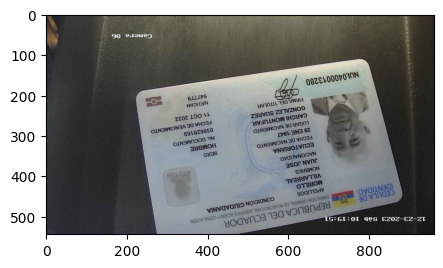

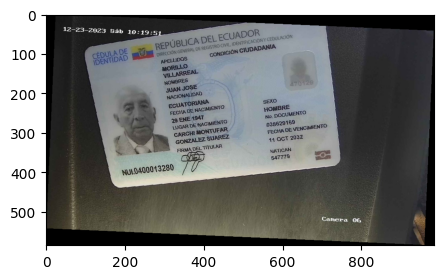

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
img_or = Image.open("/root/jastudillo/Trabajo/Training_Cedulas2.0 (2)/dataset/images/train/0e02b2aa-ImagenCedula_1345.jpg").convert("RGB").rotate(180,expand=True)  # Asegúrate de que la imagen esté en modo RGB
img = transform(img_or).unsqueeze(0)  # Añadir batch dimension
with torch.no_grad():
    pred = model(img)
    pred_angle = pred.item() * 180 / np.pi  # Convertir a grados
    print(f"Ángulo predicho: {pred_angle:.2f}°")
plt.figure(figsize=(5, 5))
plt.imshow(img_or)
plt.figure(figsize=(5, 5))
plt.imshow(img_or.rotate(-pred_angle,expand=True))